# Data Analysis for Kaggle Diabetes Prediction Challenge

## 1. Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Data/DiabetesPredictionChallenge/train.csv")
df

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,...,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0,0.0
699996,699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,...,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1,1.0
699997,699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,...,Female,White,Graduate,Middle,Never,Employed,0,0,0,1.0
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,...,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0


In [4]:
df.shape

(700000, 26)

In [13]:
df["id"].unique()

array([     0,      1,      2, ..., 699997, 699998, 699999],
      shape=(700000,))

In [14]:
df = df.drop(columns=["id"],axis=1)

In [15]:
categorical_columns = ["gender","ethnicity","education_level","income_level","smoking_status","employment_status","family_history_diabetes","hypertension_history","cardiovascular_history"]
quantitative_columns = [name for name in df.columns if name not in categorical_columns and name not in ["id","diagnosed_diabetes"]]

## 2. Draw Histograms

### 2.1 Quantitative Columns

In [16]:
df_num = df[quantitative_columns]
df_num

,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides
0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102
1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124
2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,89,73,188,59,114,108
3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,69,74,182,54,85,123
4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,60,85,206,49,131,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699995,29,1,59,6.9,5.2,1.5,26.1,0.88,133,57,69,163,58,90,126
699996,46,2,72,7.7,7.7,3.8,25.5,0.85,106,85,65,188,45,107,119
699997,35,1,50,5.6,6.1,6.4,26.9,0.88,127,84,63,168,59,77,166
699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,69,198,55,108,133


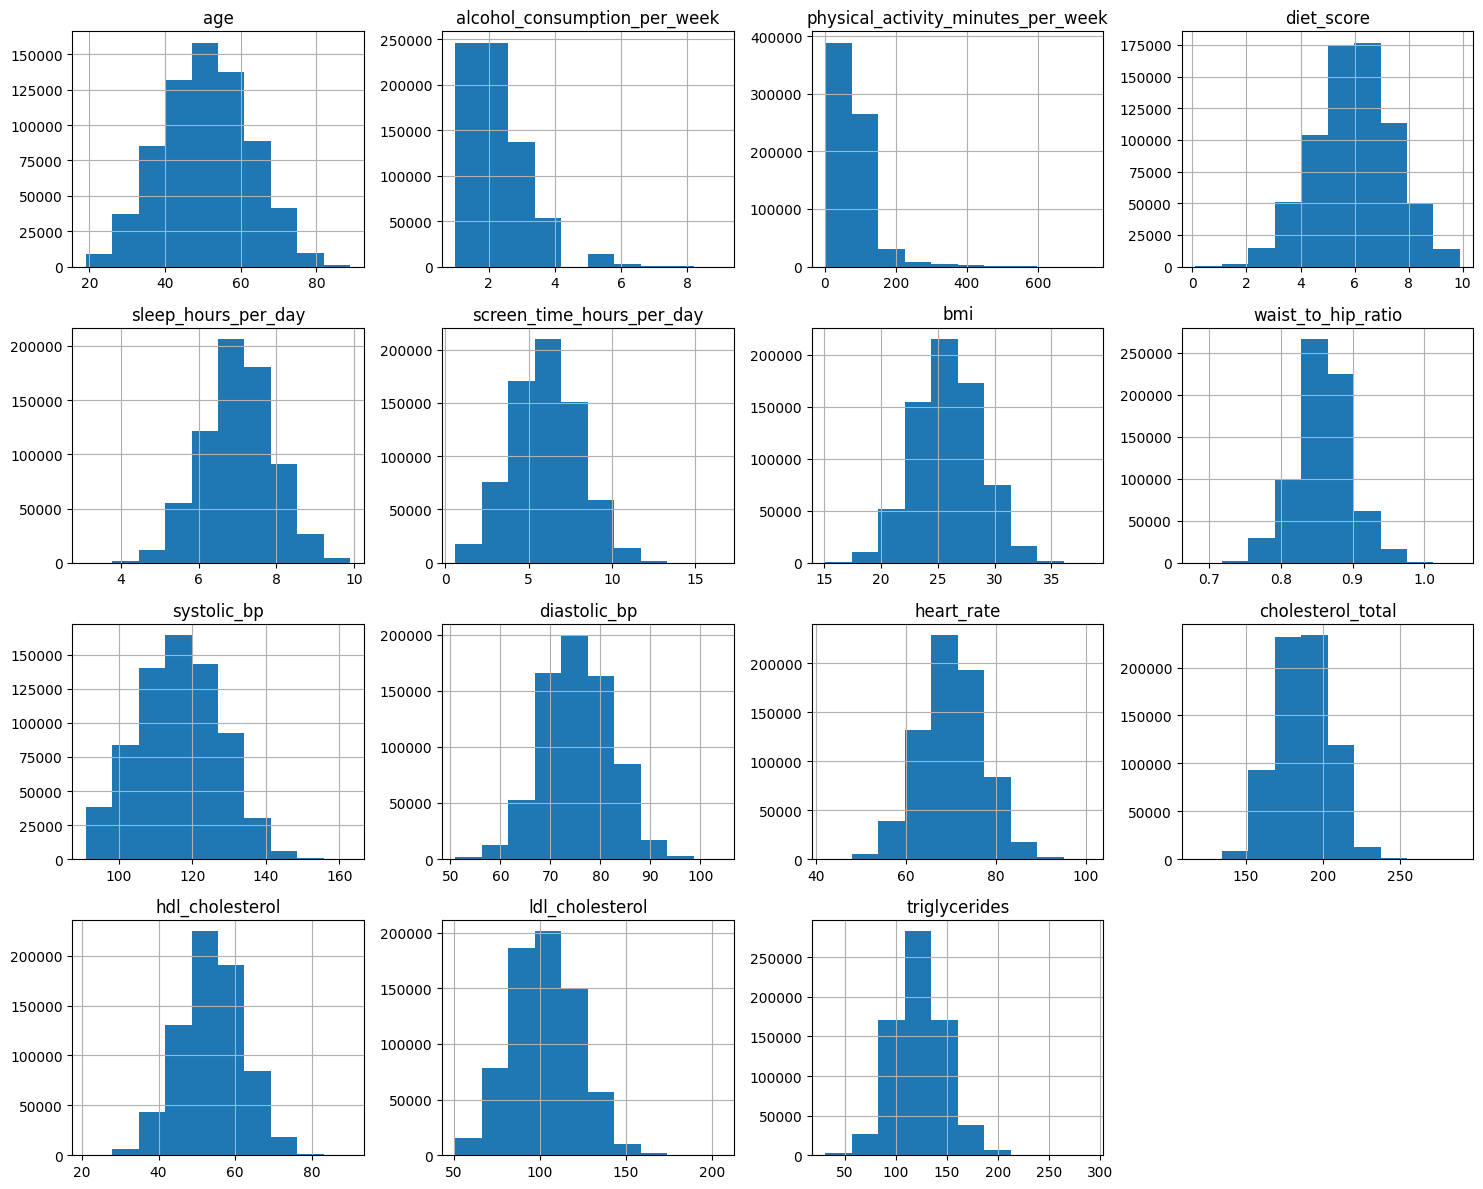

In [17]:
df_num.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

### 2.2 Qualitative Variables

In [18]:
df_cat = df[categorical_columns]
df_cat


,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0
1,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0
2,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0
3,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0
4,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0
...,...,...,...,...,...,...,...,...,...
699995,Female,Hispanic,Postgraduate,Upper-Middle,Former,Employed,0,0,0
699996,Female,Hispanic,Graduate,Upper-Middle,Former,Employed,0,0,1
699997,Female,White,Graduate,Middle,Never,Employed,0,0,0
699998,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0


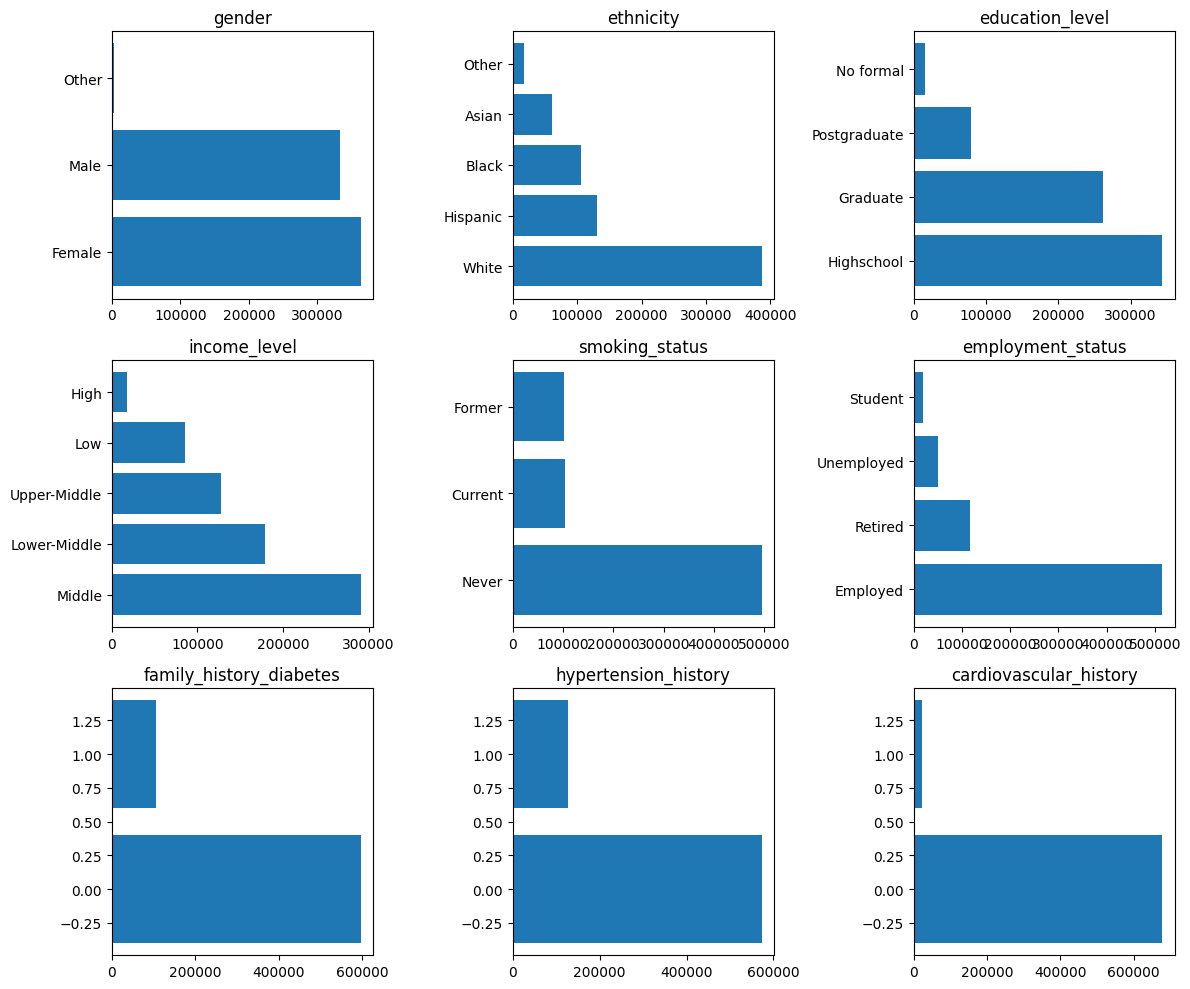

In [20]:
figure,axes = plt.subplots(len(categorical_columns) // 3, 3, figsize=(12,10))


for idx,category in enumerate(categorical_columns):
    col = idx % 3
    row = idx // 3

    category_values = df_cat[category].value_counts()

    axes[row,col].barh(category_values.index,width=category_values.values)
    axes[row,col].set_title(category)

plt.tight_layout()
plt.show()

In [22]:
df_cat['family_history_diabetes'].value_counts()

family_history_diabetes
0    595419
1    104581
Name: count, dtype: int64

## 3. Correlation

In [26]:
import seaborn as sns

C:\Users\posze\AppData\Local\Temp\ipykernel_21984\1300840178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['diagnosed_diabetes'] = df["diagnosed_diabetes"]


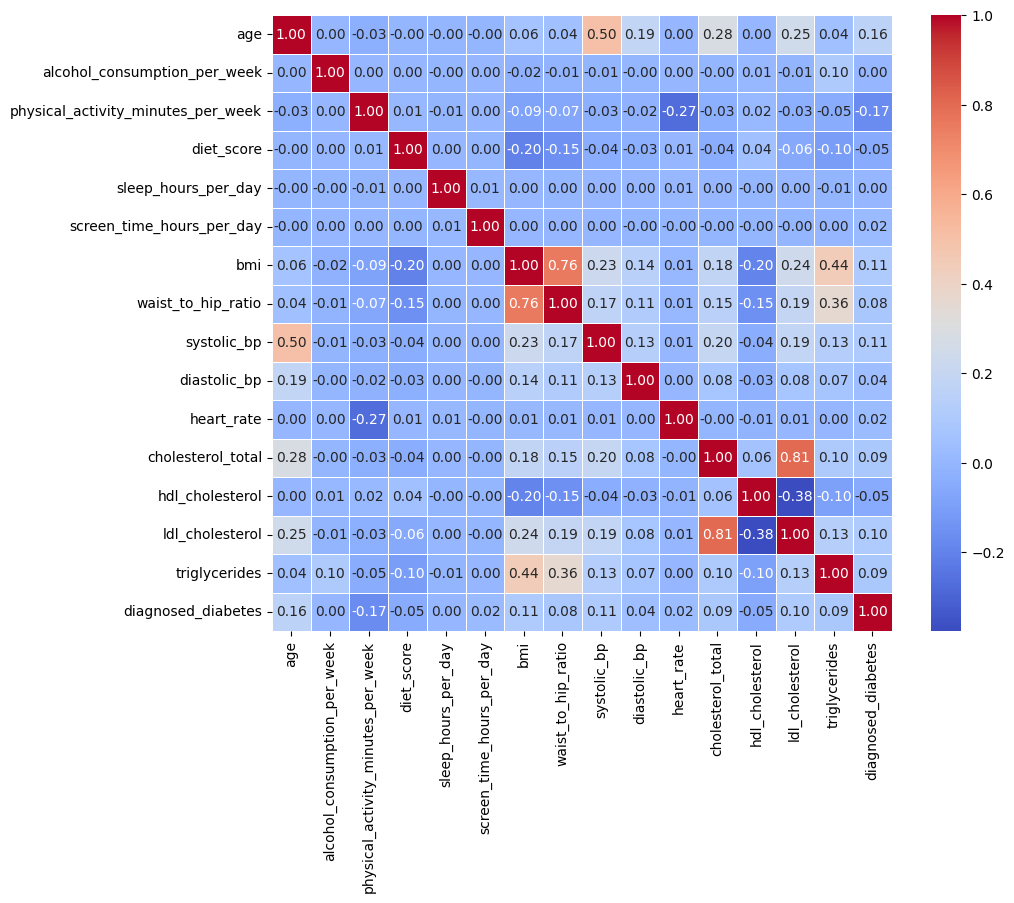

In [28]:
df_num['diagnosed_diabetes'] = df["diagnosed_diabetes"]
correlation_matrix = df_num.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5,
    cbar=True
)

plt.show()

In [ ]:
df_encoded = pd.get_dummies(df,columns=categorical_columns,drop_first=True)

plt.figure(figsize=(15,10))
sns.heatmap(df_encoded.corr()[['diagnosed_diabetes']].sort_values(by='diagnosed_diabetes',ascending=False),annot=True,cmap='coolwarm')